#### <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">Cars4u Used Car Pricing Prediction Model
### by Anthony Amabile
This is an analysis of the Indian used car market. The goal of the analysis is to predict the prices of used cars so that the company can employ of strategy of pricing used cars at the optimal market price. This way, the customer gets used cars at the market price and not above it, and the company, Cars4U, won't price cars below the market price.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
# to build linear regression_model
from sklearn.linear_model import LinearRegression
# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('/Users/Tony/Documents/Texas Austin AI ML/Supervised Learning Regression/Project 2')
os.getcwd()

'c:\\Users\\Tony\\Documents\\Texas Austin AI ML\\Supervised Learning Regression\\Project 2'

In [3]:
df = pd.read_csv('used_cars_data.csv')
df.sample(10, random_state=1)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.00000,9.47 Lakh,6.00000
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.00000,5.44 Lakh,4.11000
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.00000,NaN,6.00000
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.00000,NaN,35.28000
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.00000,NaN,6.34000
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.00000,28.05 Lakh,24.82000
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.00000,NaN,32.00000
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.00000,NaN,20.77000
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.00000,NaN,2.50000
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.00000,9.36 Lakh,8.20000


In [4]:
df['Mileage'].str.len()

0      10.00000
1      10.00000
2       9.00000
3      10.00000
4       9.00000
         ...   
7248   10.00000
7249   10.00000
7250   10.00000
7251    9.00000
7252    9.00000
Name: Mileage, Length: 7253, dtype: float64

In [5]:
df['Mileage'] = df['Mileage'].str.strip()

In [6]:
df['Mileage'].str.len()

0      10.00000
1      10.00000
2       9.00000
3      10.00000
4       9.00000
         ...   
7248   10.00000
7249   10.00000
7250   10.00000
7251    9.00000
7252    9.00000
Name: Mileage, Length: 7253, dtype: float64

In [7]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the original dataset.')

There are 7253 rows and 14 columns in the original dataset.


In [8]:
df.dtypes

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [9]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00000,NaN,1.75000
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.00000,NaN,12.50000
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.00000,8.61 Lakh,4.50000
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.00000,NaN,6.00000
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.00000,NaN,17.74000


In [10]:
#stripping the text from the mileage column and making it a string
df['Mileage'] = df['Mileage'].str.extract('(\d+)').astype(float)

In [11]:
#we need to remove cc from the end of the engine column
def engine_to_num(engine):
    """In the engine column I'm replacing the 'CC' with
    the empty string and converting to a float. Non-strings are 
    np.nans and are kept as np.nans."""
    if isinstance(engine, str):
        return float(engine.replace(' CC', ''))
    else:
        return engine

#we need to remove bhp from the end of the power column
def power_to_num(power):
    """In the power column I'm replacing the 'bhp' with
    the empty string and converting to a float. Non-strings are 
    np.nans and are kept as np.nans."""
    if isinstance(power, str):
        return float(power.replace(' bhp', ''))
    else:
        return power

#we need to change seat to int from float
def seat_to_int(seats):
    """I'm converting number of seats to an int from float ."""
    if isinstance(seats, float):
        return seats
    else:
        if isinstance(seats, float):
            return int(seats)
        else:
            return seats

col_transforms = {
   # 'Mileage': mileage_to_num,
    'Engine': engine_to_num,
    'Power': power_to_num,
    'Seats': seat_to_int,
}

# k is the key, so the column name here
# v is the value, which a function in this case and is
#     either `height_to_num` or `weight_to_num`
for k,v in col_transforms.items():
    df[k] = df[k].map(v)




In [12]:
# We can use the year column to get an age of the car
df['Car_age'] = 2021 - df['Year'] 

# Once we have age of the car, we can drop the year column.
df.drop(['Year'],axis=1,inplace=True)

In [13]:
df.head()

,S.No.,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_age
0,0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,26.00000,998.00000,58.16000,5.00000,NaN,1.75000,11
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.00000,1582.00000,126.20000,5.00000,NaN,12.50000,6
2,2,Honda Jazz V,Chennai,46000,Petrol,Manual,First,18.00000,1199.00000,88.70000,5.00000,8.61 Lakh,4.50000,10
3,3,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,20.00000,1248.00000,88.76000,7.00000,NaN,6.00000,9
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,Second,15.00000,1968.00000,140.80000,5.00000,NaN,17.74000,8


In [14]:
print(df['Transmission'].nunique())
print(df['Fuel_Type'].nunique())
print(df['Owner_Type'].nunique())

2
5
4


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.00000,3626.00000,2093.90508,0.00000,1813.00000,3626.00000,5439.00000,7252.00000
Kilometers_Driven,7253.00000,58699.06315,84427.72058,171.00000,34000.00000,53416.00000,73000.00000,6500000.00000
Mileage,7251.00000,17.71769,4.55984,0.00000,15.00000,18.00000,21.00000,33.00000
Engine,7207.00000,1616.57347,595.28514,72.00000,1198.00000,1493.00000,1968.00000,5998.00000
Power,7078.00000,112.76521,53.49355,34.20000,75.00000,94.00000,138.10000,616.00000
Seats,7200.00000,5.27972,0.81166,0.00000,5.00000,5.00000,5.00000,10.00000
Price,6019.00000,9.47947,11.18792,0.44000,3.50000,5.64000,9.95000,160.00000
Car_age,7253.00000,7.63463,3.25442,2.00000,5.00000,7.00000,10.00000,25.00000


Observations
1. There are 7,253 cars in our data set.  
2. The median price for a used car in the data set is 5.64 Lakh. The highest price is 160 Lakh and the minimum price is .44.
3. Most of the cars in the data set have 5 seats.
4. The oldest car in the data is 25 years old and the newest car in the data is 2 years old.



In [16]:
df.isnull().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
Car_age                 0
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Location                0
Name                    0
S.No.                   0
dtype: int64

In [17]:
# We don't need the new price column, especially since it's mostly empty
df.drop(['New_Price'],axis=1,inplace=True)

In [18]:
#We will drop the missing values in `Price` column as it is the target variable.
df.dropna(subset=["Price"], inplace=True)

In [19]:
df.head()

,S.No.,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_age
0,0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,26.00000,998.00000,58.16000,5.00000,1.75000,11
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.00000,1582.00000,126.20000,5.00000,12.50000,6
2,2,Honda Jazz V,Chennai,46000,Petrol,Manual,First,18.00000,1199.00000,88.70000,5.00000,4.50000,10
3,3,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,20.00000,1248.00000,88.76000,7.00000,6.00000,9
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,Second,15.00000,1968.00000,140.80000,5.00000,17.74000,8


In [20]:
def missing_check(dataf):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df['S.No.'].count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
missing_check(df)


,Total,Percent
Power,143,0.02376
Seats,42,0.00698
Engine,36,0.00598
Mileage,2,0.00033
Car_age,0,0.00000
Price,0,0.00000
Owner_Type,0,0.00000
Transmission,0,0.00000
Fuel_Type,0,0.00000
Kilometers_Driven,0,0.00000


In [21]:
#86% of the rows for New_price are missing data
df.dropna(subset=["Power"], inplace=True)
df.dropna(subset=["Mileage"], inplace=True)
df.dropna(subset=["Seats"], inplace=True)

In [22]:
def missing_check(dataf):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df['S.No.'].count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
missing_check(df)


,Total,Percent
Car_age,0,0.00000
Price,0,0.00000
Seats,0,0.00000
Power,0,0.00000
Engine,0,0.00000
Mileage,0,0.00000
Owner_Type,0,0.00000
Transmission,0,0.00000
Fuel_Type,0,0.00000
Kilometers_Driven,0,0.00000


In [23]:
print(f'After cleaning our data has {df.shape[0]:,.0f} rows and {df.shape[1]} columns.')

After cleaning our data has 5,872 rows and 13 columns.


In [24]:
df['Kilometers_Driven']

0        72000
1        41000
2        46000
3        87000
4        40670
         ...  
6014     27365
6015    100000
6016     55000
6017     46000
6018     47000
Name: Kilometers_Driven, Length: 5872, dtype: int64

In [25]:
# Height is in inches
binned_km_driven = pd.cut(df['Kilometers_Driven'], [-np.inf,  20000, 40000, 80000, 120000, np.inf])
binned_km_driven
binned_km_driven.value_counts(dropna=False)

(40000.0, 80000.0]     2820
(20000.0, 40000.0]     1360
(80000.0, 120000.0]     792
(-inf, 20000.0]         618
(120000.0, inf]         282
Name: Kilometers_Driven, dtype: int64

In [26]:
df['km_driven_bin'] = pd.cut(
    df['Kilometers_Driven'], [-np.inf,  20000, 40000, 80000, 120000, np.inf], 
    labels = ["Under 20k'", "20k' to 40k", "40k to 80k", "80k to 120k", "Over 120k"]
)
#df.drop(['Kilometers_Driven'], axis=1, inplace=True)
df['km_driven_bin'].value_counts(dropna=False)

40k to 80k     2820
20k' to 40k    1360
80k to 120k     792
Under 20k'      618
Over 120k       282
Name: km_driven_bin, dtype: int64

In [27]:
# we can extract the make or manufacturer of each car and then drop the name of the car
df['Make'] = df.Name.str.split().str.get(0)

df.drop(['Name', 'S.No.'],axis=1,inplace=True)

In [28]:
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_age,km_driven_bin,Make
0,Mumbai,72000,CNG,Manual,First,26.00000,998.00000,58.16000,5.00000,1.75000,11,40k to 80k,Maruti
1,Pune,41000,Diesel,Manual,First,19.00000,1582.00000,126.20000,5.00000,12.50000,6,40k to 80k,Hyundai
2,Chennai,46000,Petrol,Manual,First,18.00000,1199.00000,88.70000,5.00000,4.50000,10,40k to 80k,Honda
3,Chennai,87000,Diesel,Manual,First,20.00000,1248.00000,88.76000,7.00000,6.00000,9,80k to 120k,Maruti
4,Coimbatore,40670,Diesel,Automatic,Second,15.00000,1968.00000,140.80000,5.00000,17.74000,8,40k to 80k,Audi


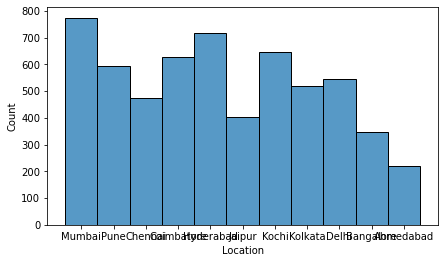

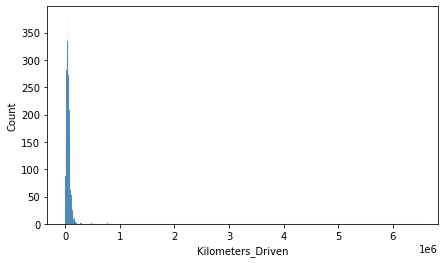

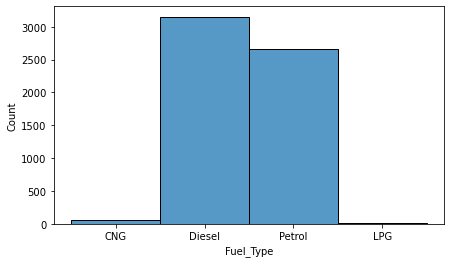

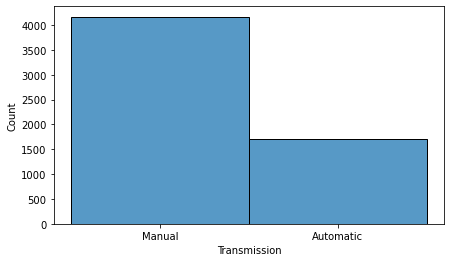

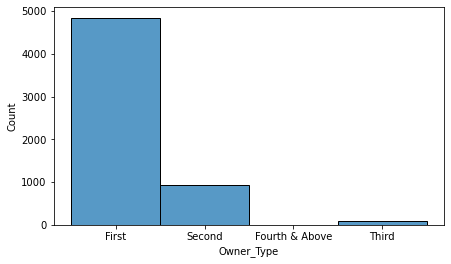

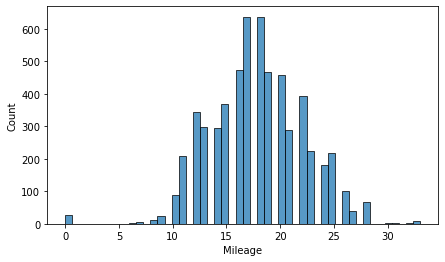

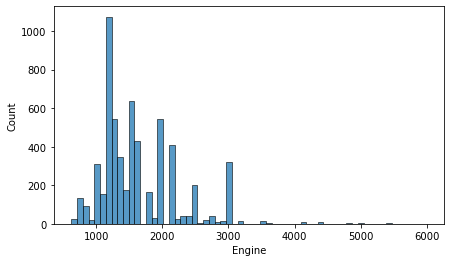

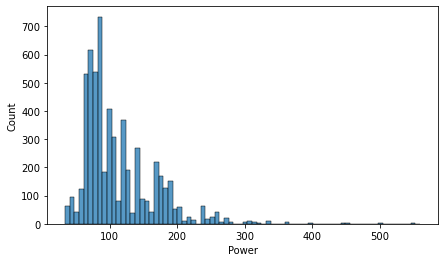

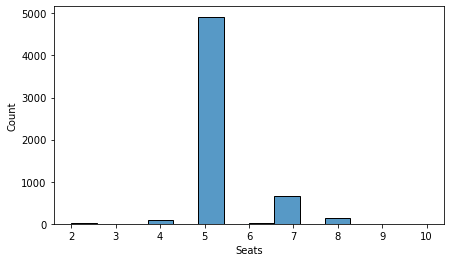

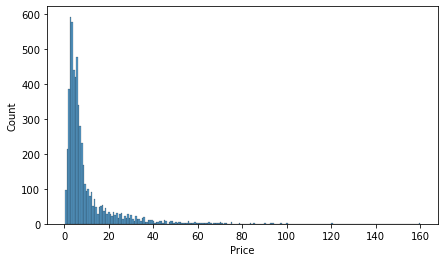

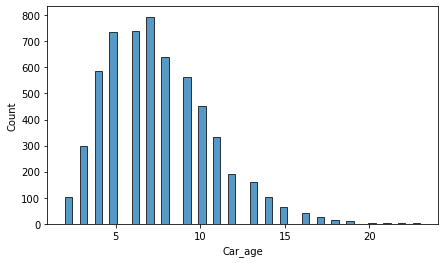

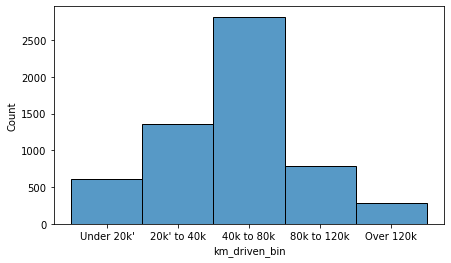

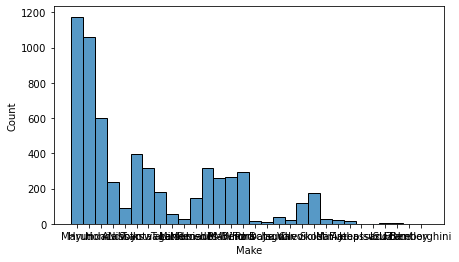

In [29]:
# Let's look at the distribution of all the variables

for i in df.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=i)
    plt.show()

Observations
1. Most of the cars are 10 years old and under.
2. Most of the cars have been driven 40k to 80k kilometers.
3. Price is greatly concentrated between 0-5 Lakh. 
4. Most of the cars run on diesel or petrol.
5. The power of most of the cars is under 100.


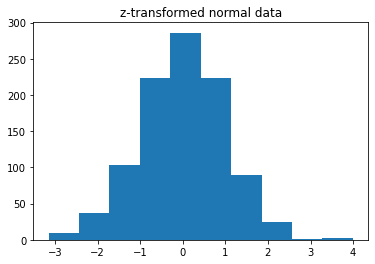

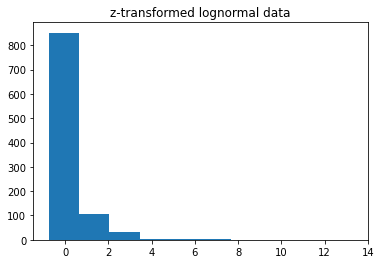

In [30]:
def z_transform(x):
    return (x - np.mean(x)) / np.std(x)

np.random.seed(1)
x1 = np.random.normal(size=1000)
x2 = np.random.lognormal(size=1000)


plt.hist(z_transform(x1))
plt.title('z-transformed normal data')
plt.show()


plt.hist(z_transform(x2))
plt.title('z-transformed lognormal data')
plt.show()


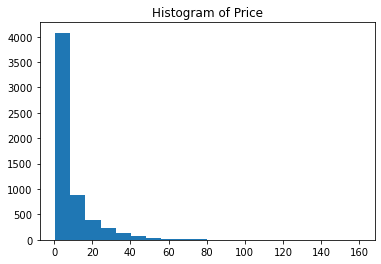

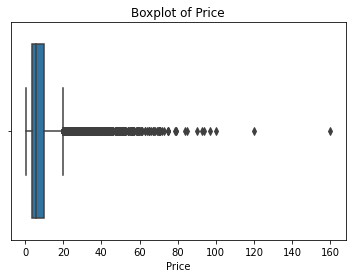

In [31]:
plt.hist(df['Price'], 20)
plt.title('Histogram of Price')
plt.show()

sns.boxplot(df['Price'])
plt.title('Boxplot of Price')
plt.show()

In [32]:
quartiles = np.quantile(df['Price'][df['Price'].notnull()], [.25, .75])
price_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {price_4iqr}')
outlier_price = df.loc[np.abs(df['Price'] - df['Price'].median()) > price_4iqr, 'Price']
outlier_price

Q1 = 3.5175, Q3 = 10.0, 4*IQR = 25.93


67      35.67000
92      39.58000
134     54.00000
148     37.00000
168     45.00000
          ...   
5919   100.00000
5921    36.00000
5927    45.52000
5946    48.00000
6008    45.00000
Name: Price, Length: 318, dtype: float64

In [33]:
# if we wanted to make these NA we could just do this
# [not run]
df.loc[np.abs(df['Price'] - df['Price'].median()) > price_4iqr, 'Price'] = np.nan

In [34]:
# dropping these rows
# [not run]
df.drop(outlier_price.index, axis=0, inplace=True)

In [35]:
price = df['Price'][df['Price'].notnull()]
print(price.mean())  # the mean is being pulled
print(price.median())

7.504749729924408
5.5


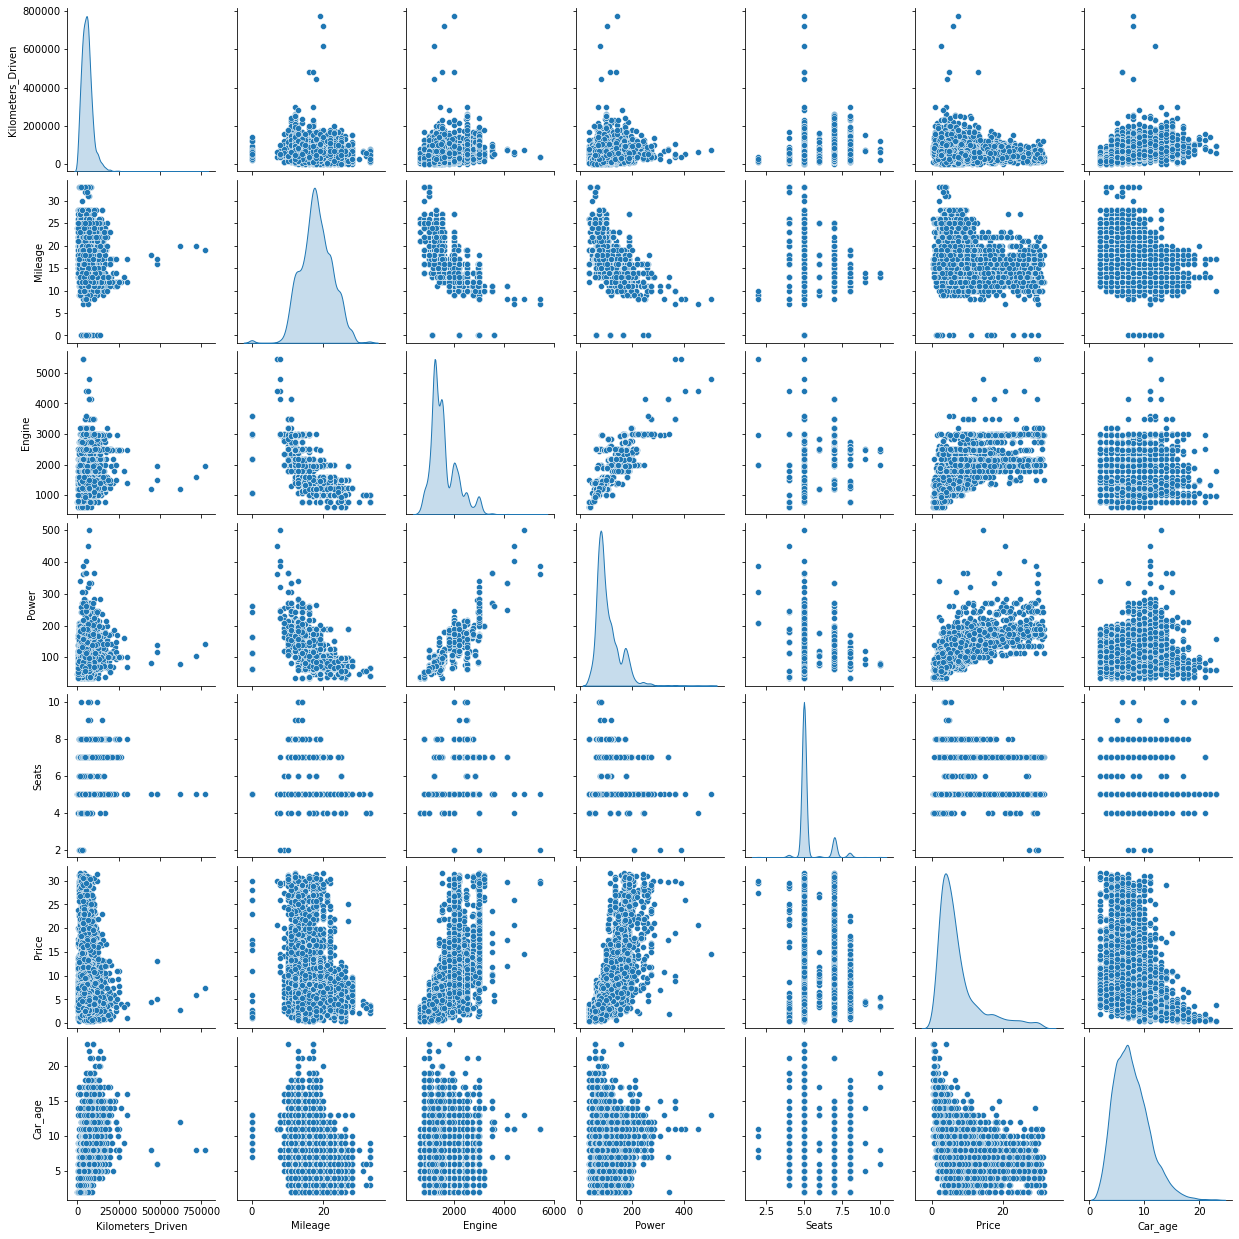

In [36]:
sns.pairplot(df, diag_kind='kde')

In [37]:
correlation = df.corr()
correlation

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Car_age
Kilometers_Driven,1.00000,-0.17028,0.24652,0.09216,0.21070,-0.09581,0.43316
Mileage,-0.17028,1.00000,-0.63467,-0.53549,-0.36045,-0.31940,-0.34039
Engine,0.24652,-0.63467,1.00000,0.83768,0.49153,0.63421,0.14211
Power,0.09216,-0.53549,0.83768,1.00000,0.17370,0.73909,0.07118
Seats,0.21070,-0.36045,0.49153,0.17370,1.00000,0.16709,-0.00871
Price,-0.09581,-0.31940,0.63421,0.73909,0.16709,1.00000,-0.30226
Car_age,0.43316,-0.34039,0.14211,0.07118,-0.00871,-0.30226,1.00000


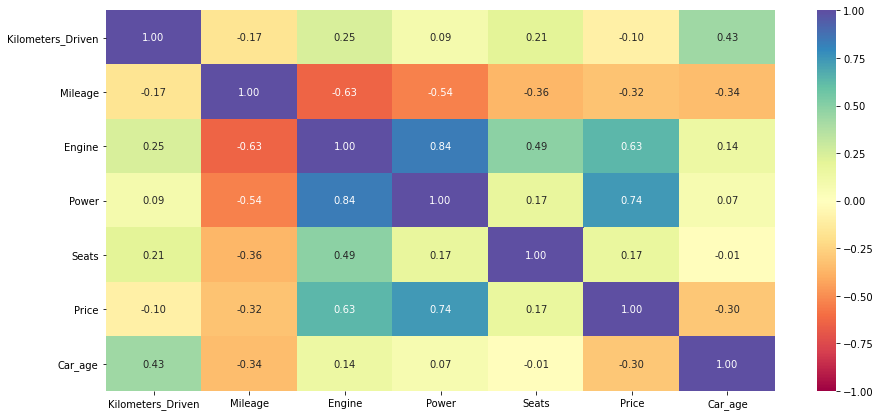

In [38]:
plt.figure(figsize=(15,7))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='Spectral')
plt.show()

Observations
1. There is a strong positive correlation between power and engine.
2. There is also a relatively strong positive correlation between power and price and engine and price.
3. There is a strong negative correlation between engine and mileage and power and mileage.
4. Price has a weak negative correlation with car age.



In [39]:
# creating a function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

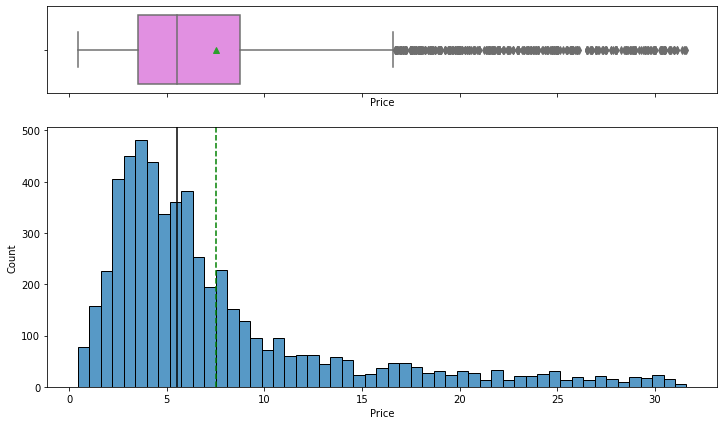

In [40]:
histogram_boxplot(df, "Price")

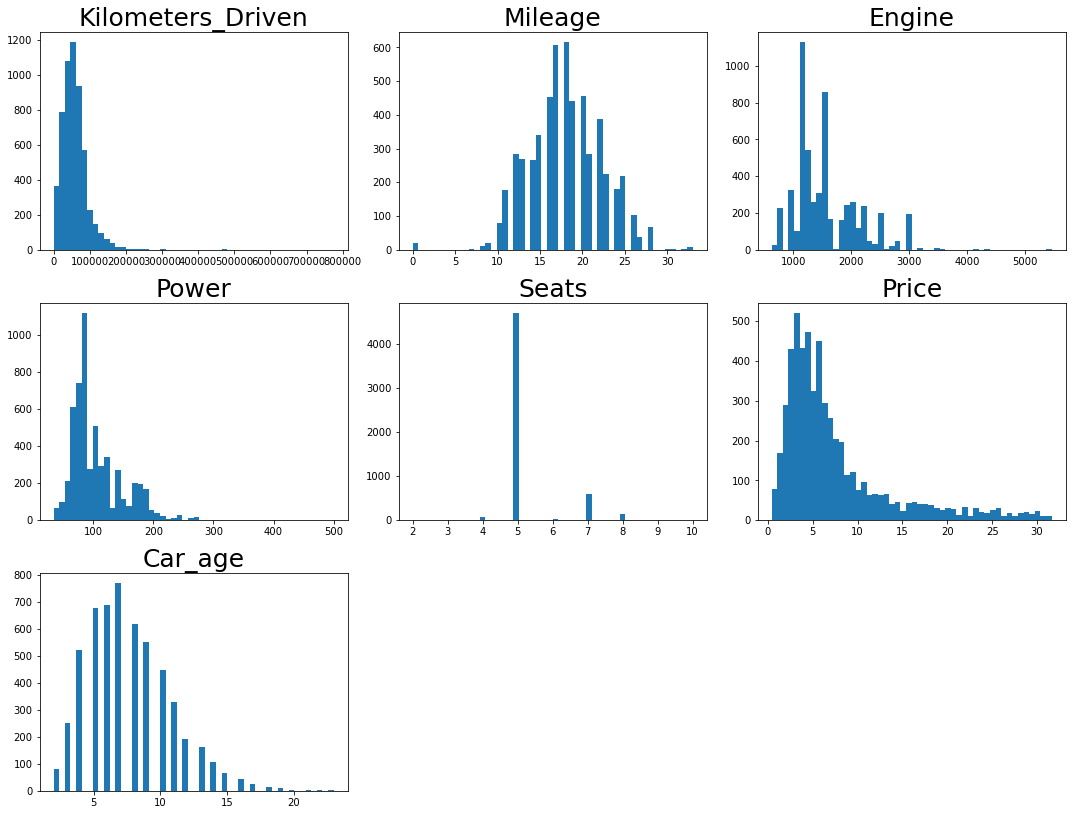

In [41]:
# creating a list of non-tag columns
dist_cols = [
    item for item in df.select_dtypes(include=np.number).columns if "S.No" not in item
]

# let's plot a histogram of all non-tag columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(df[dist_cols[i]], bins=50)
    # sns.histplot(data=df3, x=dist_cols[i], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

In [42]:
df1 = df.copy()

In [43]:
X = df1.drop(["Price"], axis=1)
y = df1["Price"]

In [44]:
X = pd.get_dummies(
    X, 
    columns=X.select_dtypes(include=['object', 'category']).columns.tolist(), 
    drop_first=True,
)
X.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Car_age,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,km_driven_bin_20k' to 40k,km_driven_bin_40k to 80k,km_driven_bin_80k to 120k,km_driven_bin_Over 120k,Make_Audi,Make_BMW,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Honda,Make_Hyundai,Make_ISUZU,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_Porsche,Make_Renault,Make_Skoda,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo
0,72000,26.00000,998.00000,58.16000,5.00000,11,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,41000,19.00000,1582.00000,126.20000,5.00000,6,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,46000,18.00000,1199.00000,88.70000,5.00000,10,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,87000,20.00000,1248.00000,88.76000,7.00000,9,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,40670,15.00000,1968.00000,140.80000,5.00000,8,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
x_train,x_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=1)


In [46]:
print('The number of rows in the train data is', x_train.shape[0])
print('The number of rows in the test data is', x_test.shape[0])

The number of rows in the train data is 3887
The number of rows in the test data is 1667


In [47]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

In [48]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df #['Coefficients'].sort(ascending=False)

,Coefficients
Kilometers_Driven,-0.00001
Mileage,-0.18544
Engine,0.00006
Power,0.05118
Seats,0.38675
Car_age,-0.65982
Location_Bangalore,0.64534
Location_Chennai,0.09232
Location_Coimbatore,0.91951
Location_Delhi,-0.79477


### Coefficient Interpretations

* Coefficients of `Seats`,  `power`, some of the `location` columns, some of the `Make` columns, etc. are positive.
    - Increase in these will lead to an increase in the price of a used car in India.


* Coefficients of `km_driven`, `Car_age`,  `Fuel_Type_Petrol`, some of the `location` columns, some of the `Make` columns etc. are negative.
    - Increase in these will lead to a decrease in the price of a used car in India.

In [49]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [50]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2.57108,1.71873,0.83695,0.83466,37.07707


In [51]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2.45936,1.67352,0.82802,0.82226,37.01290


**Observations**

- The train and test $R^2$ are 0.837 and 0.828, indicating that the model explains 83.7% and 82.8% of the total variation in the train and test sets respectively. Also, both scores are comparable.

- RMSE values on the train and test sets are also comparable.

- This shows that the model is not overfitting.

- MAE indicates that our current model is able to predict used car prices within a mean error of 1.63 Lakh on the test set.

- MAPE of 37 on the test data means that we are able to predict within ~37% of the used car price.

## Conclusions

- We have been able to build a predictive model that can be used by Cars4U to predict the price of a used car in India with an $R^2$ of 0.83 on the training set.


- Cars4U can use this model to predict the used car price within a mean error of 1.67 Lakh on the test set.


- We found that the seats, and power are some of the factors which tend to increase the price of a used car.


- We found that total kilometers driven, car, age and cars that take petrol are some of the factors which tend to decrease the price of a used car.


- We improved our linear regression model performance by applying non-linear transformations to some of the attributes and removing some outliers with extremely high prices.


- Cars4U can also explore non-linear models, which might be able to better identify the patterns in the data to predict used car price with even higher accuracy.

### Reccomendations
Cars4u Fitness should set their prices for used cars  by:
* Varying the price for cars depending on the location and make of the car.